In [55]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy import signal
from scipy.optimize import curve_fit

df=pd.read_csv('center_sternum.txt',sep='\t')

df['Time']=np.arange(0,len(df['qi']))/200

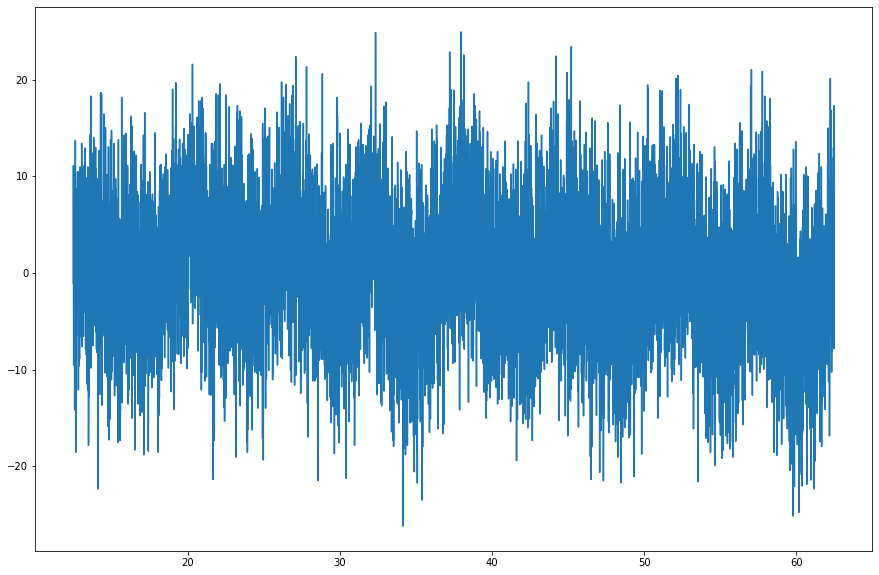

In [107]:
plt.figure(figsize=(15,10))
plt.plot(df['Time'].iloc[2500:12500],df['AccX'].iloc[2500:12500]-np.mean(df['AccX'].iloc[2500:12500]))
#plt.xlim(20,21)

(0.0, 8000.0)

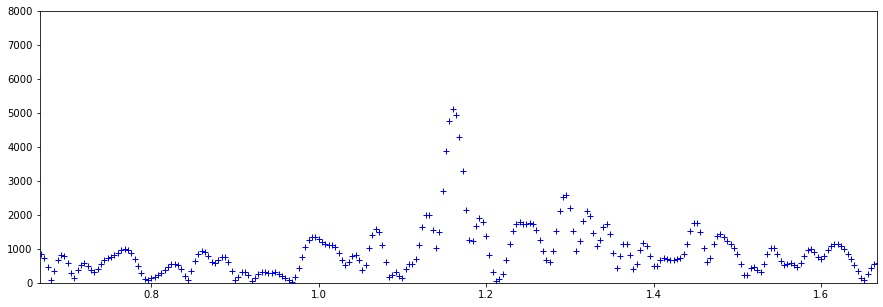

In [146]:
accxfreq=np.fft.fft(df['AccX'].iloc[2500:12500]-np.mean(df['AccX'].iloc[2500:12500]),n=50000)

freq=np.fft.fftfreq(d=1/200, n=len(accxfreq))

#select heart-beat freq
min_f=40./60.
max_f=100./60.

plt.figure(figsize=(15,5))
plt.plot(freq,np.abs(accxfreq),'b+')
plt.xlim(min_f, max_f)
plt.ylim(0,8000)


Mean:	 1.1609655425041923
Parameters:	 [  1.16103353  84.19404078  48.20620066 980.88841033]


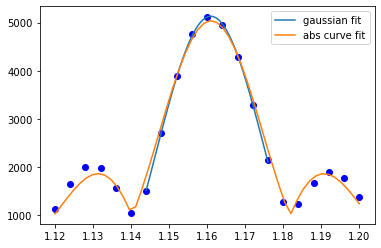

In [147]:
min_f=40./60.
max_f=100./60.

def trasf_grad(freq,mean,A,T,h): #with abs value!!
    return np.abs((A/(np.pi*(freq-mean))) * np.sin(np.pi*(freq-mean)*T))+h

def gauss(x,a,x0,sigma, offset):
    return a*np.exp(-(x-x0)**2/(2*sigma**2)) + offset

def hist_freq (x,y): #NB change p0 and height
    x_heart=[]
    y_heart=[]
    for i in range(len(x)):
        if x[i]<=max_f and x[i]>=min_f:
            x_heart.append(x[i])
            y_heart.append(y[i])
        
    peaks,_ = signal.find_peaks(y_heart, height=3000)
    for i in peaks:
        plt.plot(x_heart[i-10:i+11],y_heart[i-10:i+11],'bo')
        
        popt,pcov = curve_fit(gauss,x_heart[i-4:i+5],y_heart[i-4:i+5],p0=[4000,1.16,0.03, 1000], maxfev = 3000)
        x_fit=np.linspace(x_heart[i-4],x_heart[i+4])
        plt.plot(x_fit,gauss(x_fit,*popt),label='gaussian fit')
        print('Mean:\t',popt[1])
        
        global popt2
        popt2,pcov2 = curve_fit(trasf_grad,x_heart[i-10:i+11],y_heart[i-10:i+11],p0=[popt[1],4000,10,1000], maxfev = 3000)
        x_fit2=np.linspace(x_heart[i-10],x_heart[i+10])
        plt.plot(x_fit2,trasf_grad(x_fit2,*popt2),label='abs curve fit')        
        plt.legend()
        print('Parameters:\t',popt2)


    
hist_freq(freq,np.abs(accxfreq))

(980.0, 990.0)

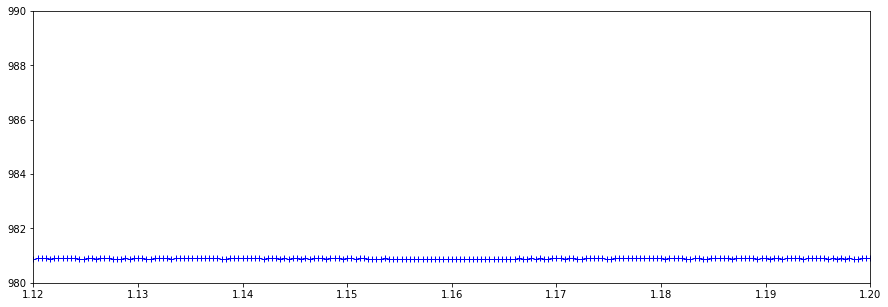

In [163]:
accxfreq=np.fft.fft(df['AccX'].iloc[2500:12500]-np.mean(df['AccX'].iloc[2500:12500]),n=500000)
freq=np.fft.fftfreq(d=1/200, n=len(accxfreq))

new_y_freq=trasf_grad(np.abs(accxfreq),popt2[0],popt2[1],popt2[2],popt2[3])
new_y_freq[(freq>1.2)]=0
new_y_freq[(freq<1.12)]=0

plt.figure(figsize=(15,5))
plt.plot(freq,new_y_freq,'b+')
plt.xlim(1.12,1.2)
plt.ylim(980,990)

C:\Users\Elena\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Center sternum')

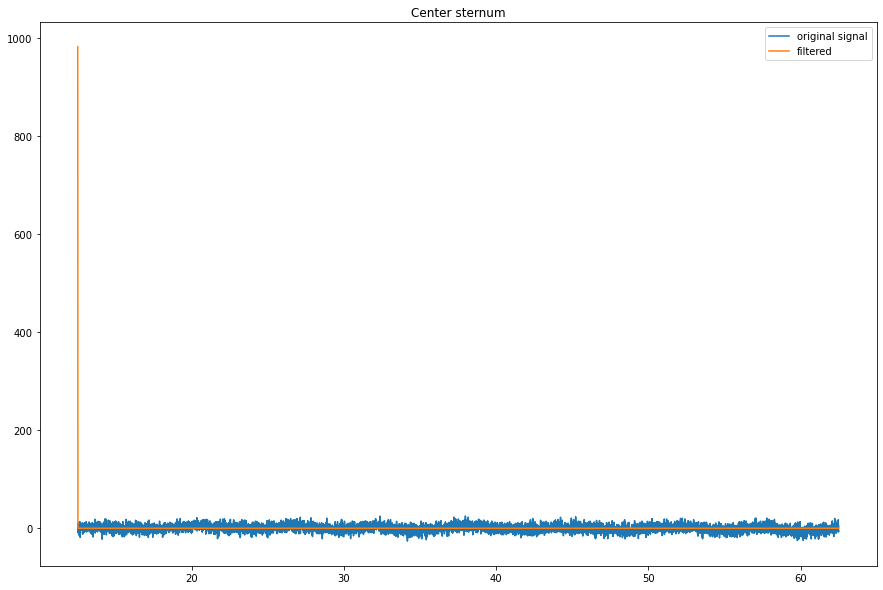

In [164]:
accxfreq=np.fft.fft(df['AccX'].iloc[2500:12500]-np.mean(df['AccX'].iloc[2500:12500]))

freq=np.fft.fftfreq(d=1/200, n=len(accxfreq))

signal_inverse = np.fft.ifft(trasf_grad(np.abs(accxfreq),popt2[0],popt2[1],popt2[2],popt2[3]))

fig,ax=plt.subplots(1,1,figsize=(15,10))
 

plt.plot(df['Time'].iloc[2500:12500],df['AccX'].iloc[2500:12500]-np.mean(df['AccX'].iloc[2500:12500]),label='original signal')
plt.plot(df['Time'].iloc[2500:12500],signal_inverse,label='filtered')
plt.legend()
plt.title('Center sternum')
#plt.xlim(30,33)

C:\Users\Elena\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(30.0, 33.0)

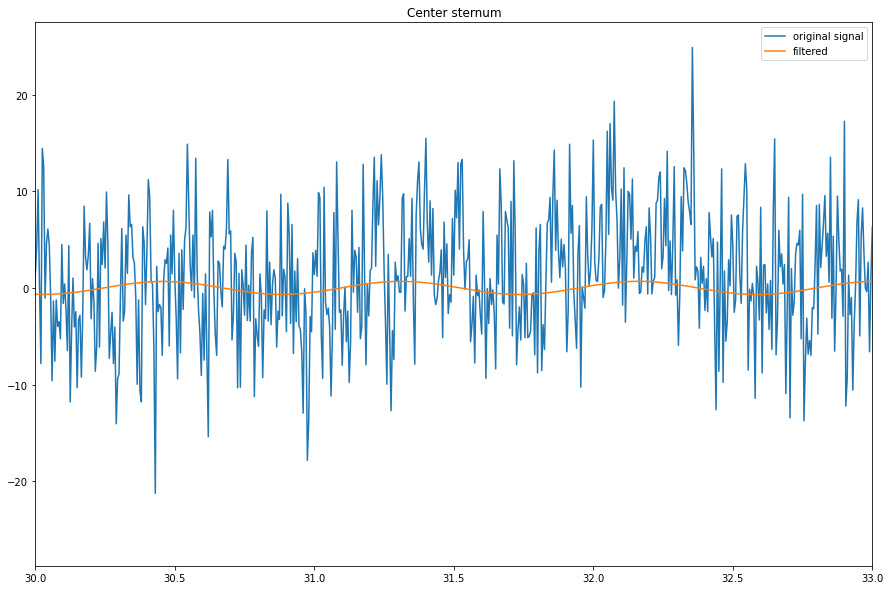

In [102]:

accx=np.fft.fft(df['AccX'].iloc[2500:12500]-np.mean(df['AccX'].iloc[2500:12500]))
accxfreq=np.fft.fftfreq(d=1/200, n=len(accx))

                        
cut_signal = accx.copy()
cut_signal[(accxfreq>1.2)]= 0 
cut_signal[(accxfreq<1.14)] = 0 

cut_signal_inverse = np.fft.ifft(cut_signal)

fig,ax=plt.subplots(1,1,figsize=(15,10))
 

plt.plot(df['Time'].iloc[2500:12500],df['AccX'].iloc[2500:12500]-np.mean(df['AccX'].iloc[2500:12500]),label='original signal')
plt.plot(df['Time'].iloc[2500:12500],cut_signal_inverse,label='filtered')
plt.legend()
plt.title('Center sternum')
plt.xlim(30,33)